EDA

In [1]:
import pandas as pd
df=pd.read_csv("/content/wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
# Print the number of rows and columns in the dataset
print(df.shape)

# Print the data types of each column
print(df.dtypes)

# Print the summary statistics of the dataset
print(df.describe())

(178, 14)
Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500  

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate values
print(df.duplicated().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64
0


2. Examine the distribution of features using histograms, box plots, or density plots

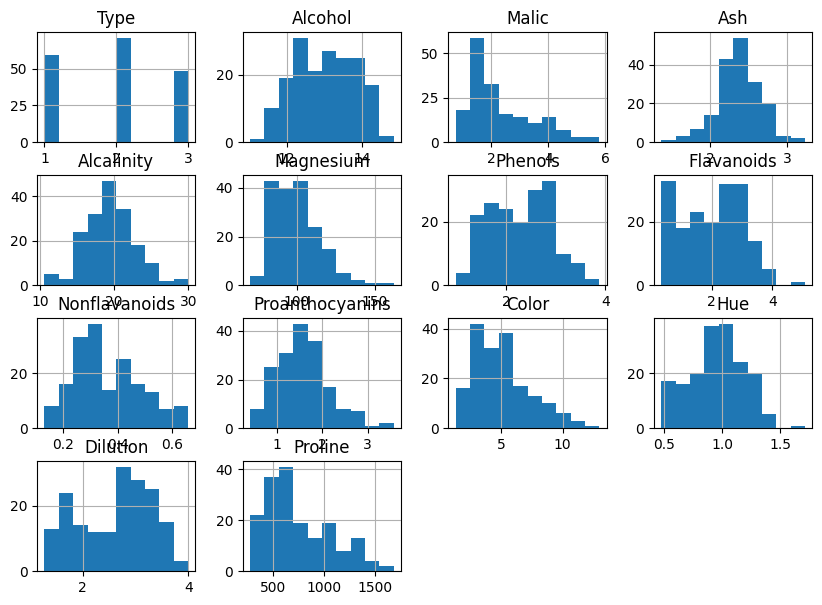

In [4]:
import matplotlib.pyplot as plt

# Create histograms for each column
df.hist(figsize=(10, 7))
plt.show()

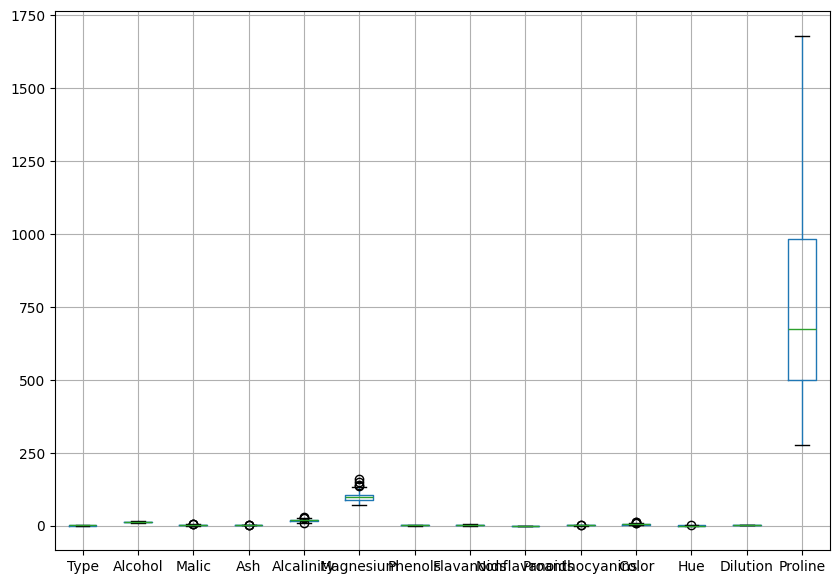

In [5]:
# Create box plots for each column
df.boxplot(figsize=(10, 7))
plt.show()

<Axes: title={'center': 'Malic'}, xlabel='Type'>

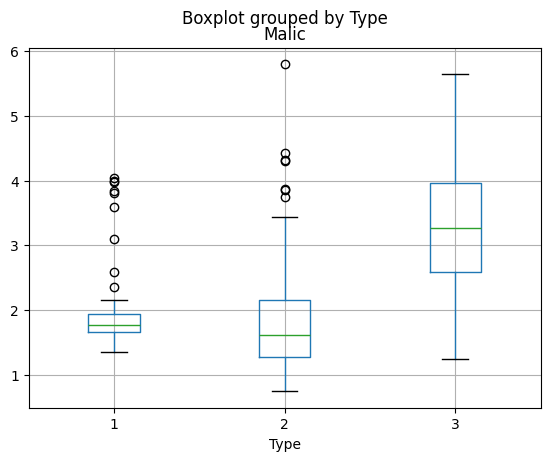

In [6]:
df.boxplot('Malic', by='Type')

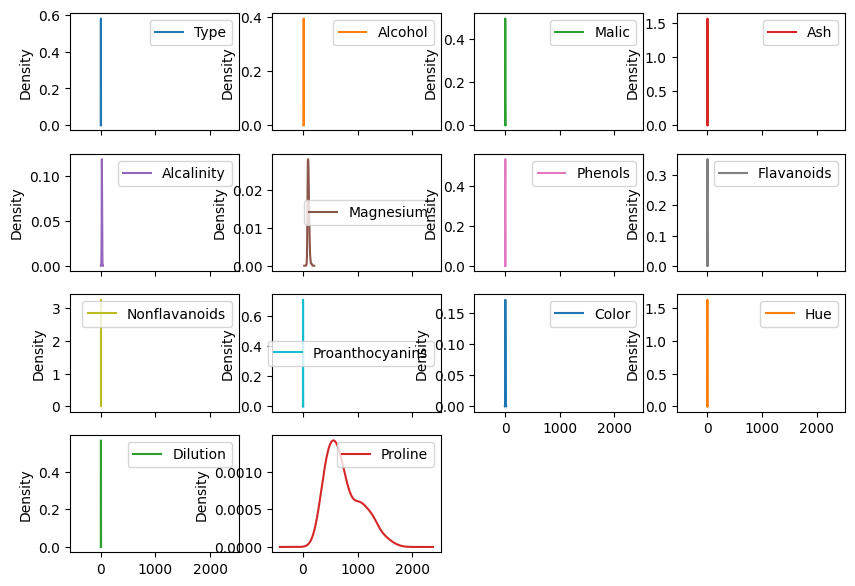

In [7]:
# Create density plots for each column
df.plot(kind='density', subplots=True, layout=(4, 4), figsize=(10, 7))
plt.show()

                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

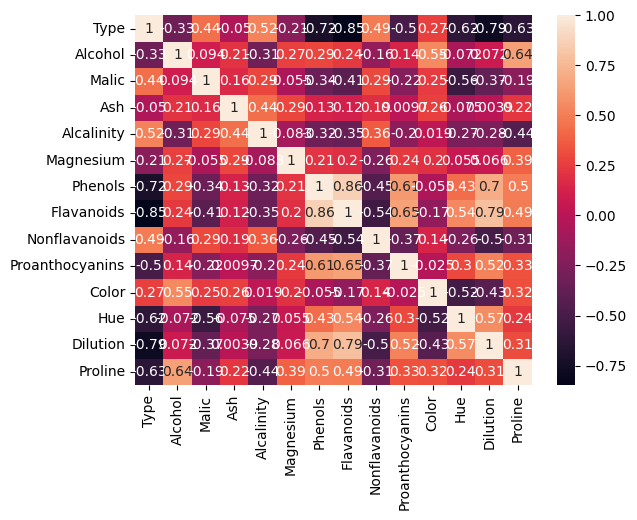

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Dimensionality Reduction with PCA

1.Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [9]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Implement PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_features = pca.fit_transform(scaled_features)

# Print the results
print("Original features shape:", df.shape)
print("Transformed features shape:", pca_features.shape)

Original features shape: (178, 14)
Transformed features shape: (178, 4)


2. Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

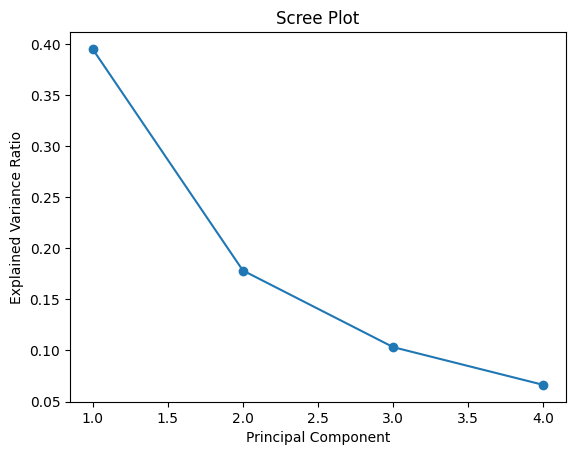

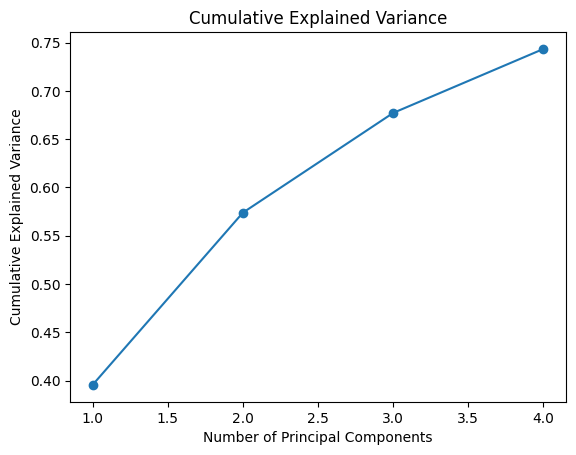

In [10]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
import numpy as np
# Create a scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

 3.Transform the original dataset into the principal components.

In [11]:
transformed_data = pca.transform(df)
print(transformed_data)

[[-304.45767569  438.23342546 -108.78717118 -290.35933252]
 [-297.3656085   423.46662038 -113.21259784 -282.95223826]
 [-332.53702582  474.18218352 -125.15180911 -316.11226201]
 [-414.37603966  587.40490446 -162.62001579 -393.6737305 ]
 [-212.32062214  313.96864583  -64.38663013 -204.26208508]
 [-406.14716712  575.44442538 -159.9964251  -386.52227136]
 [-360.94510574  511.23336909 -142.14389538 -343.22658213]
 [-364.48313535  520.35580101 -137.53696956 -348.60655273]
 [-295.33901237  422.0245589  -111.62646613 -280.85439925]
 [-295.1066805   422.77926845 -110.17971962 -280.64785292]
 [-420.97558628  594.62003852 -166.64749278 -400.24330256]
 [-357.23238312  506.89926887 -139.92664801 -340.92495205]
 [-367.63926501  520.00031585 -146.03561331 -349.81992394]
 [-324.00961811  458.87395236 -126.8768986  -306.50701997]
 [-432.18667758  608.44580574 -175.50785528 -409.34937495]
 [-367.43314585  524.16004062 -141.02522136 -350.98739685]
 [-359.94929099  515.43667521 -134.37605656 -344.2000879

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Clustering with Original Data

Apply a clustering algorithm (e.g., K-means) to the original dataset

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]
     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174   

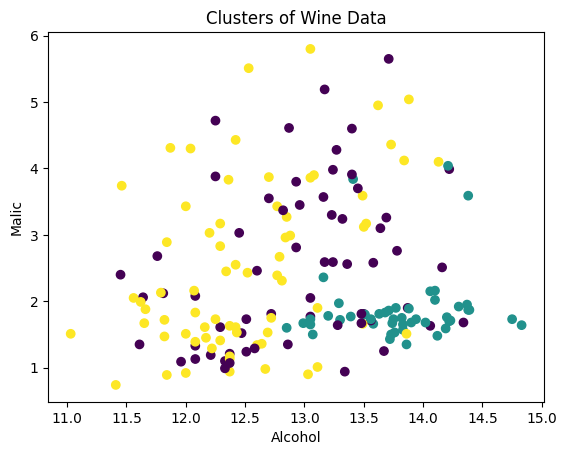

In [12]:
from sklearn.cluster import KMeans

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
print(labels)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Print the DataFrame with cluster labels
print(df)

# Visualize the clusters
plt.scatter(df['Alcohol'], df['Malic'], c=labels)
plt.xlabel('Alcohol')
plt.ylabel('Malic')
plt.title('Clusters of Wine Data')
plt.show()

Visualize the clustering results using appropriate plots

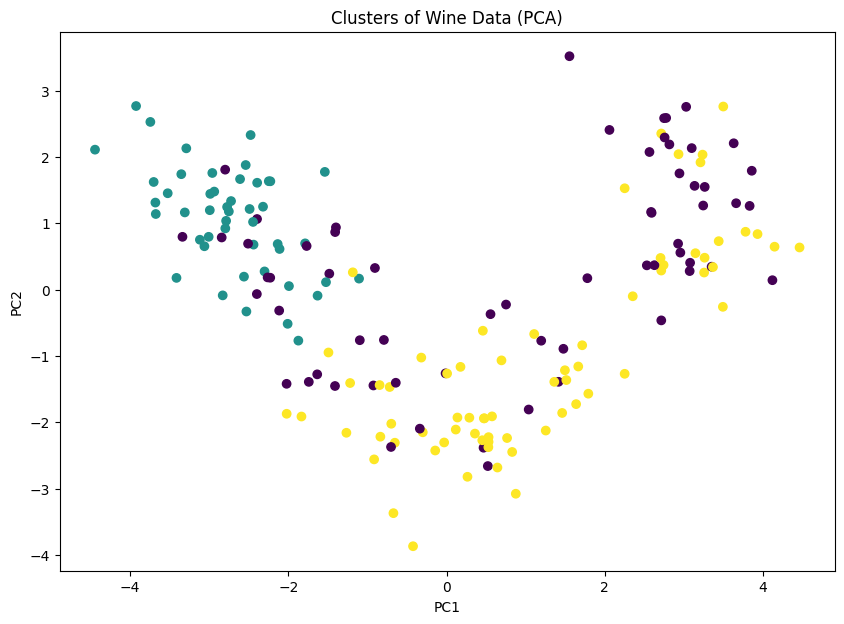

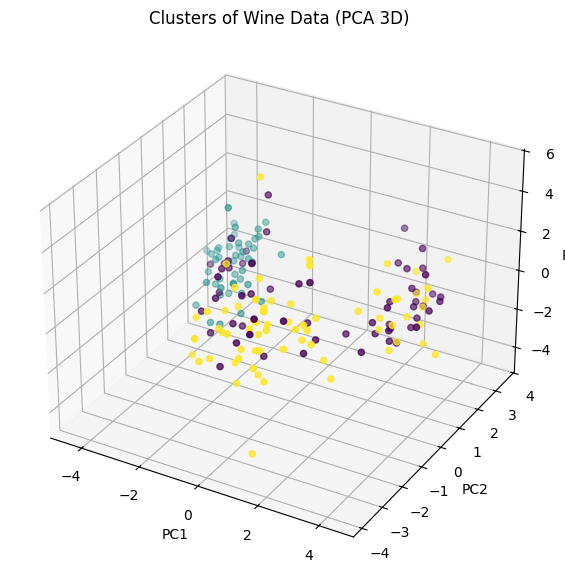

In [13]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Wine Data (PCA)')
plt.show()

# Visualize the clusters using a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=labels)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.title.set_text('Clusters of Wine Data (PCA 3D)')
plt.show()

Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df, labels)
print("Silhouette score:", silhouette_avg)

# Calculate the Davies-Bouldin index
davies_bouldin = davies_bouldin_score(df, labels)
print("Davies-Bouldin index:", davies_bouldin)


Silhouette score: 0.571140440717417
Davies-Bouldin index: 0.5342554741398516


Clustering with PCA Data

Apply the same clustering algorithm to the PCA-transformed dataset

In [15]:
# Apply K-means clustering with 3 clusters to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(pca_features)

# Get the cluster labels for the PCA-transformed dataset
labels_pca = kmeans_pca.labels_

# Print the cluster labels for the PCA-transformed dataset
print(labels_pca)

# Add the cluster labels for the PCA-transformed dataset to the DataFrame
df['Cluster_PCA'] = labels_pca

# Print the DataFrame with cluster labels for the PCA-transformed dataset
print(df)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174   

Visualize the clusters for the PCA-transformed dataset using a scatter plot

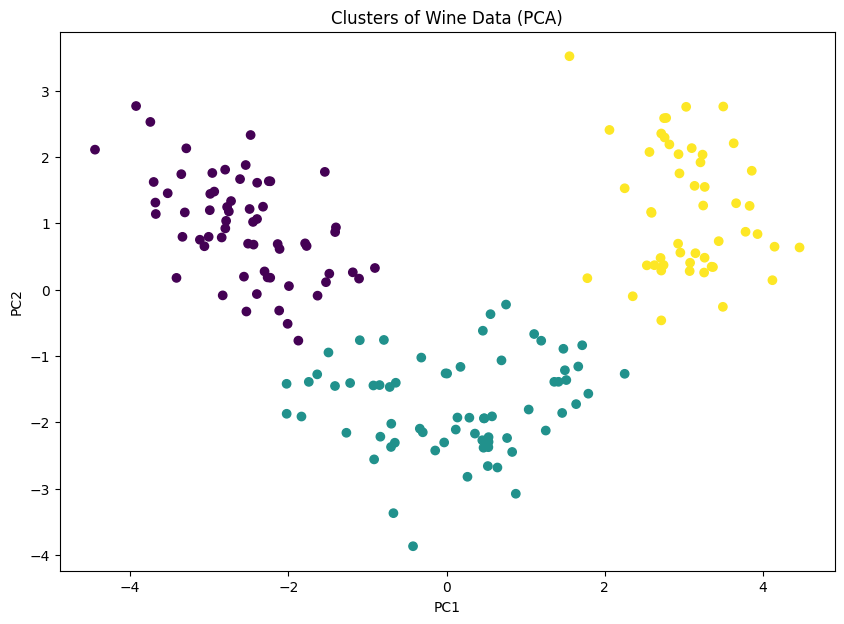

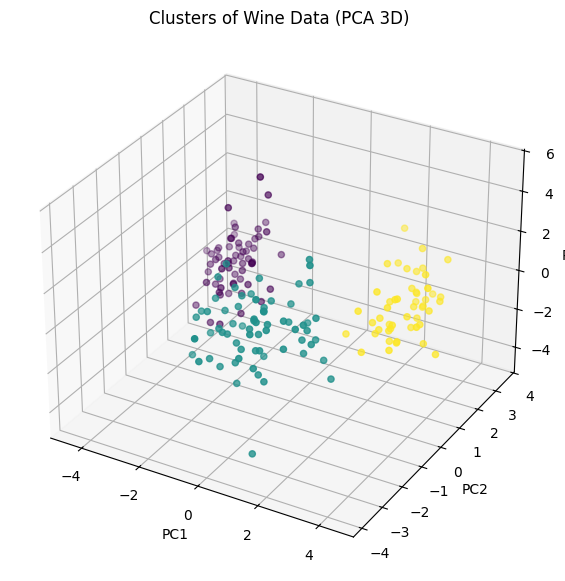

Silhouette score (PCA): 0.4367881227595952
Davies-Bouldin index (PCA): 0.9186773896497294


In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_pca)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Wine Data (PCA)')
plt.show()

# Visualize the clusters for the PCA-transformed dataset using a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=labels_pca)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.title.set_text('Clusters of Wine Data (PCA 3D)')
plt.show()

# Calculate the silhouette score for the PCA-transformed dataset
silhouette_avg_pca = silhouette_score(pca_features, labels_pca)
print("Silhouette score (PCA):", silhouette_avg_pca)

# Calculate the Davies-Bouldin index for the PCA-transformed dataset
davies_bouldin_pca = davies_bouldin_score(pca_features, labels_pca)
print("Davies-Bouldin index (PCA):", davies_bouldin_pca)

Compare the clustering results from PCA-transformed data with those from the original dataset

Silhouette score (original data): 0.571140440717417
Silhouette score (PCA-transformed data): 0.4367881227595952
Davies-Bouldin index (original data): 0.5342554741398516
Davies-Bouldin index (PCA-transformed data): 0.9186773896497294


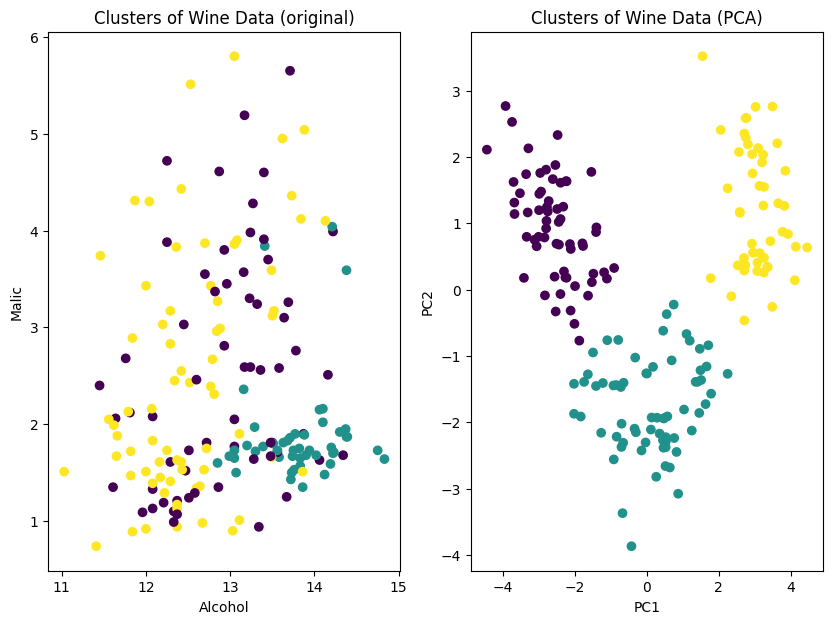

In [17]:
# Compare the silhouette scores
print("Silhouette score (original data):", silhouette_avg)
print("Silhouette score (PCA-transformed data):", silhouette_avg_pca)

# Compare the Davies-Bouldin indices
print("Davies-Bouldin index (original data):", davies_bouldin)
print("Davies-Bouldin index (PCA-transformed data):", davies_bouldin_pca)

# Visualize the clusters from both datasets
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.scatter(df['Alcohol'], df['Malic'], c=labels)
plt.xlabel('Alcohol')
plt.ylabel('Malic')
plt.title('Clusters of Wine Data (original)')

plt.subplot(1, 2, 2)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_pca)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Wine Data (PCA)')
plt.show()

Comparison and Analysis

1.Compare the clustering results obtained from the original dataset and PCA-transformed data. text
 2.	Discuss any similarities or differences observed in the clustering results
 3.	Reflect on the impact of dimensionality reduction on clustering performance
 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset

Conclusion and Insights

 1.	Summarize the key findings and insights from the assignment
 2.	Discuss the practical implications of using PCA and clustering in data analysis
 3.	Provide recommendations for when to use each technique based on the analysis conducted.